# 나만의 모델 만들기_김일호

## 패키지&데이터 불러오기

In [23]:
import numpy as np
import pandas as pd

import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("house_price.csv")

## EDA&전처리

In [24]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MEDV      506 non-null    float64
 14  CAT.MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [26]:
#결측값 확인
data.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
CAT.MEDV    0
dtype: int64

In [27]:
#사용하지 않는 컬럼 삭제
data.drop(labels="CAT.MEDV",axis=1,inplace=True)

## 독립변수 종속변수 분리하기

In [28]:
X = data.drop(labels='MEDV',axis=1)
y = data["MEDV"]

## Train set / Test set 나누기

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def vif(X):
    vif_data = pd.DataFrame()
    vif_data["Features"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif_data)
vif(X)

   Features        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


## statsmodels OLS 모듈 활용

In [31]:
X_train = sm.add_constant(X_train) #상수항 설정
model = sm.OLS(y_train,X_train) #train 데이터 사용
model_trained = model.fit()

## 다중공선성 확인

<Axes: >

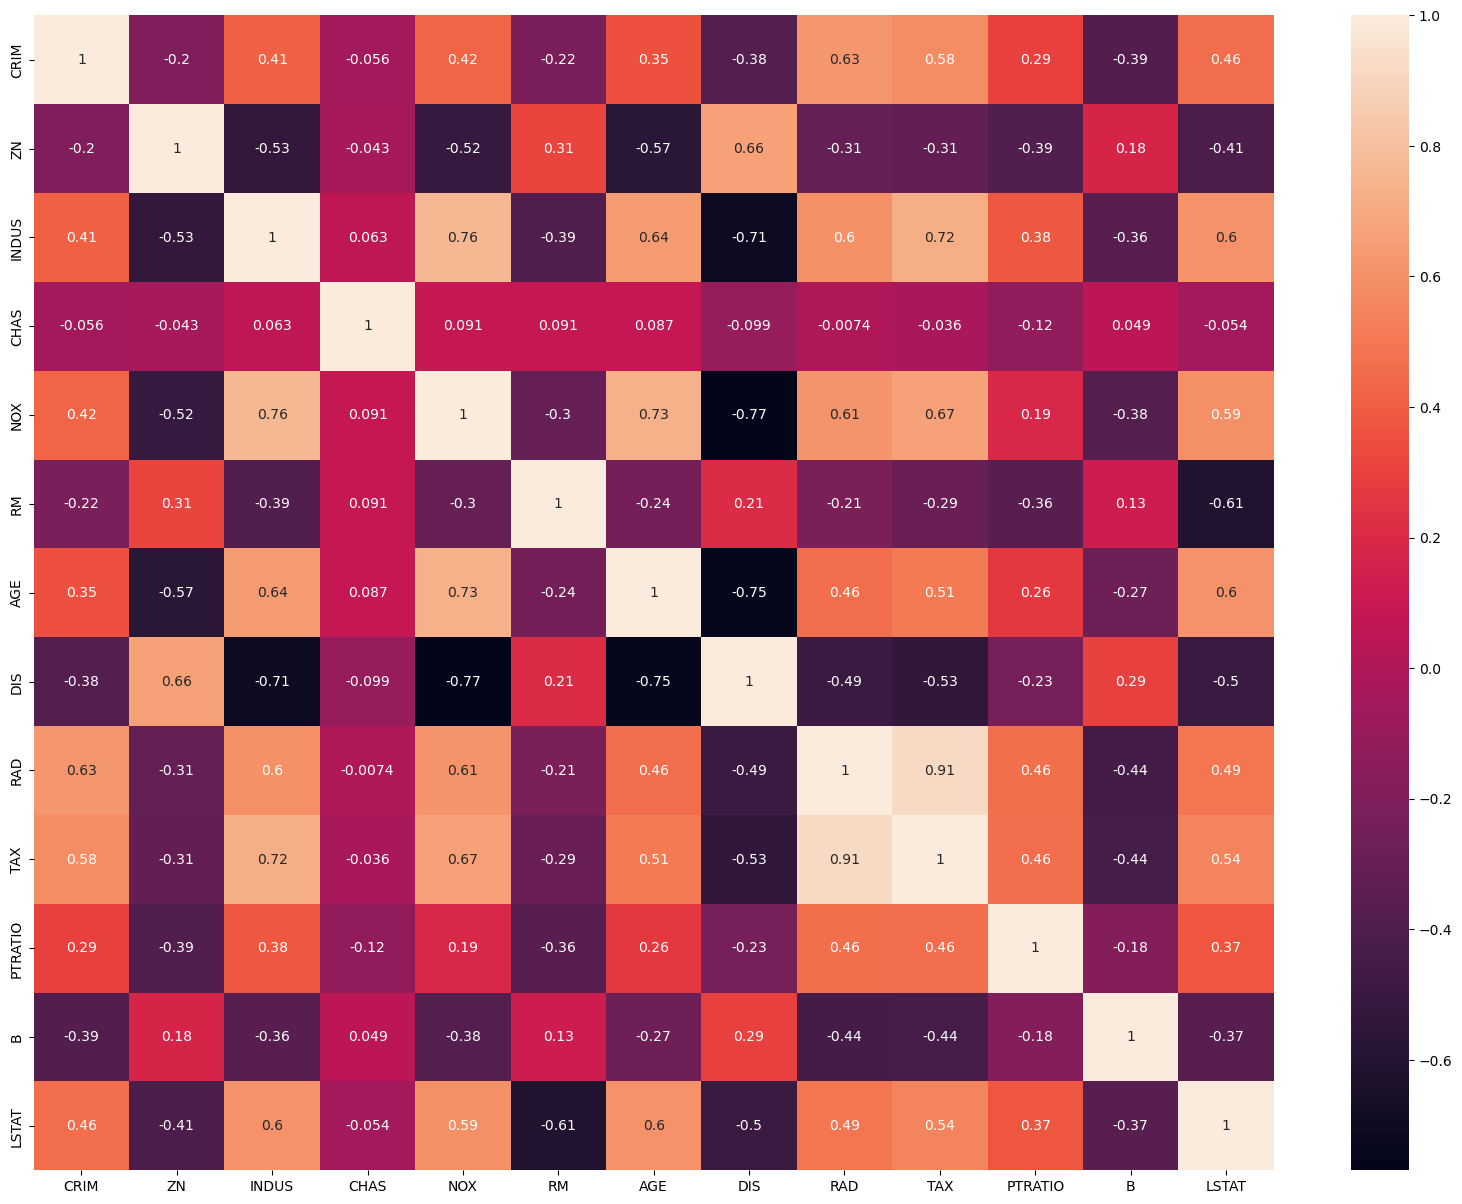

In [32]:
#히트맵으로 상관계수 확인
plt.figure(figsize=(20,15))
sns.heatmap(X.corr(), annot = True)

In [33]:
#VIF 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def vif(X):
    vif_data = pd.DataFrame()
    vif_data["Features"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif_data)
vif(X)

   Features        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


### VIF 15 이하로 맞추기

In [34]:
vif(X.drop('PTRATIO',axis=1))

   Features        VIF
0      CRIM   2.099345
1        ZN   2.451624
2     INDUS  14.275283
3      CHAS   1.142167
4       NOX  73.894171
5        RM  60.598846
6       AGE  21.361234
7       DIS  12.221605
8       RAD  15.159162
9       TAX  59.301541
10        B  18.614751
11    LSTAT  10.138324


In [35]:
vif(X.drop(['PTRATIO','TAX'],axis=1))

   Features        VIF
0      CRIM   2.099343
1        ZN   2.375220
2     INDUS  11.158724
3      CHAS   1.120106
4       NOX  71.923884
5        RM  59.969882
6       AGE  21.345067
7       DIS  11.942251
8       RAD   5.175102
9         B  18.554685
10    LSTAT  10.081165


In [36]:
vif(X.drop(['PTRATIO','TAX','NOX'],axis=1))

  Features        VIF
0     CRIM   2.097466
1       ZN   2.375219
2    INDUS   9.290080
3     CHAS   1.118613
4       RM  39.069063
5      AGE  19.780944
6      DIS  11.817803
7      RAD   4.965633
8        B  18.289917
9    LSTAT   9.046248


In [37]:
vif(X.drop(['PTRATIO','TAX','NOX','RM'],axis=1))

  Features        VIF
0     CRIM   2.095367
1       ZN   2.334763
2    INDUS   9.016142
3     CHAS   1.116229
4      AGE  14.000758
5      DIS   8.447694
6      RAD   4.771767
7        B  13.537020
8    LSTAT   8.358925


## 모델 평가

### t검정

In [38]:
data.drop(labels=['PTRATIO','TAX','NOX','RM'],axis=1,inplace=True) #다중공선성 높은 변수 넷 지우기

model_trained=model.fit()
print(model_trained.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     87.89
Date:                Tue, 25 Mar 2025   Prob (F-statistic):          3.77e-107
Time:                        15:45:56   Log-Likelihood:                -1196.5
No. Observations:                 404   AIC:                             2421.
Df Residuals:                     390   BIC:                             2477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9056      5.921      6.740      0.0

### 유의하지 않은 변수(INDUS,AGE) 제거

In [40]:
model=sm.OLS(y_train,X_train.drop(['INDUS','AGE'],axis=1))

model_trained=model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     104.2
Date:                Tue, 25 Mar 2025   Prob (F-statistic):          5.12e-109
Time:                        15:49:19   Log-Likelihood:                -1196.8
No. Observations:                 404   AIC:                             2418.
Df Residuals:                     392   BIC:                             2466.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.3885      5.862      6.719      0.0

### test 데이터로 모델 성능

In [42]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
X_test = sm.add_constant(X_test)
y_test_pred = model_trained.predict(X_test.drop(['INDUS','AGE'], axis=1))
y_test_pred

301    28.755199
262    40.435414
172    23.377391
505    22.705641
111    26.754965
         ...    
4      27.239364
210    23.262908
357    24.361527
478    19.932649
400    12.369538
Length: 102, dtype: float64

In [43]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))

Testing MSE: 23.620
Testing MAE: 3.665
Testing R2: 0.695
